# Python dictionary and Pandas dataframe

## `dict` in Python

You may have some idea about the elementary datatypes in Python such as `integer`, `float`, `complex`, and `string`. You probably also know that one can make `lists` and `arrays` of elementary datatypes to form derived 
datatypes. In Python software design, one of the most useful derived datatypes is `dict` denoting a dictionary.

A `dict` is a set of key/value pairs. Here is an example inspired by Star Wars.

In [1]:
swdict={               \
        'Luke':23,     \
        'Leia':23,     \
        'Hans Solo':36,\
        'Chewbacca':203\
       }

In [2]:
print(swdict)

In [3]:
print(type(swdict))

You can query (i.e. get/obtain) the value of an element (i.e. an entry) in the set py providing the corresponding key (i.e. label) as a string argument.

In [4]:
swdict['Chewbacca']

In [5]:
print('\'Chewbacca\' is the key and ', swdict['Chewbacca'], ' is its value')

Let's update the dictionary, i.e. add a new entry

In [6]:
swdict['Darth Vader']=45 # add an entry
print(swdict) 

You can also remove an entry from the dictionary

In [7]:
del swdict['Leia'] # remove an entry
print(swdict) 

You can delete the entire dictionary if needed

In [8]:
del swdict 
# uncomment the following line and `Run`
#print(swdict) 

Let's declare the dictionary again and learn some more options

In [9]:
swdict_full={'Luke':23,'Leia':23,'Hans Solo':36,'Darth Vader':45,'obi':57,'Chewbacca':203} 
print(swdict_full)

In [10]:
print(len(swdict_full)) # Number of entries

In [11]:
subset=('Leia','Luke')
swdict_subset= swdict_full.fromkeys(subset)
print(swdict_subset)

In [12]:
subset=('Leia','Luke')
swdict_subset= swdict_full.fromkeys(subset,'23')
print(swdict_subset)

In [13]:
print(swdict_full.keys())

dict_keys(['Luke', 'Leia', 'Hans Solo', 'Darth Vader', 'obi', 'Chewbacca'])


In [14]:
print(swdict_full.values())

dict_values([23, 23, 36, 45, 57, 203])


In [15]:
new_character={'Yoda':900}
swdict_full.update(new_character) 
print(swdict_full)

{'Luke': 23, 'Leia': 23, 'Hans Solo': 36, 'Darth Vader': 45, 'obi': 57, 'Chewbacca': 203, 'Yoda': 900}


## Dataframe in Pandas

```
Data Structure   Dimension   Description
Series               1         1D array   (Homogeneous data, Size immutable, Value mutable)
DataFrame            2         2D array - container of series (Hetegeneous, Size and Value mutable)
Panel                3         3D array - container of DataFrame
```

In [16]:
import pandas as pd

In [17]:
indices=['char-1','char-2','char-3','char-4']
Names=['Luke','Leia','Hans Solo','Chebacca']
SW_series_names=pd.Series(Names,indices)
print(SW_series_names)

char-1         Luke
char-2         Leia
char-3    Hans Solo
char-4     Chebacca
dtype: object


In [18]:
Ages=[23,23,36,203]
SW_series_ages=pd.Series(Ages,indices)
print(SW_series_ages)

char-1     23
char-2     23
char-3     36
char-4    203
dtype: int64


In [19]:
SW_df={'Name':SW_series_names, 'Age':SW_series_ages}
SW_df=pd.DataFrame(SW_df)
print(SW_df)

             Name  Age
char-1       Luke   23
char-2       Leia   23
char-3  Hans Solo   36
char-4   Chebacca  203


Here's another way to declare directly the dataframe.

In [20]:
Names=['Luke','Leia','Hans Solo','Chebacca']
Ages=[23,23,36,203]

indices=['char-1','char-2','char-3','char-4']

SW_df={'Name':pd.Series(Names,indices), 'Age':pd.Series(Ages,indices)}
SW_df=pd.DataFrame(SW_df)
print(SW_df)

             Name  Age
char-1       Luke   23
char-2       Leia   23
char-3  Hans Solo   36
char-4   Chebacca  203


You can also use default indices that start with 0 for most purposes. 

In [21]:
data=[['Luke',23],['Leia',23],['Hans Solo',36],['Chebacca',203]]
SW_df=pd.DataFrame(data,columns=['Name','Age'])
print(SW_df)

        Name  Age
0       Luke   23
1       Leia   23
2  Hans Solo   36
3   Chebacca  203


You can access the first entry using the row index `0`

In [22]:
print(SW_df.loc[0])

Name    Luke
Age       23
Name: 0, dtype: object


Again, you can use named indices if you wish.

In [23]:
SW_df=pd.DataFrame(data,columns=['Name','Age'],index=['char-1','char-2','char-3','char-4'])
print(SW_df)

             Name  Age
char-1       Luke   23
char-2       Leia   23
char-3  Hans Solo   36
char-4   Chebacca  203


Now, if you want to query, you have to use the row's `named index`.

In [24]:
print(SW_df.loc['char-1'])

Name    Luke
Age       23
Name: char-1, dtype: object


For non-string columns, you can do quick statistics with the `describe` function.

In [25]:
SW_df.describe()

,Age
count,4.000000
mean,71.250000
std,88.046863
min,23.000000
25%,23.000000
50%,29.500000
75%,77.750000
max,203.000000


For fun, let's add one more column.

In [26]:
SW_df['Popularity']=[6,9,9,8]
print(SW_df)

             Name  Age  Popularity
char-1       Luke   23           6
char-2       Leia   23           9
char-3  Hans Solo   36           9
char-4   Chebacca  203           8


In [27]:
SW_df.describe()

,Age,Popularity
count,4.000000,4.000000
mean,71.250000,8.000000
std,88.046863,1.414214
min,23.000000,6.000000
25%,23.000000,7.500000
50%,29.500000,8.500000
75%,77.750000,9.000000
max,203.000000,9.000000


The `corr` function lets you calculate the Pearson correlation between numerical columns.

In [28]:
SW_df.corr()

,Age,Popularity
Age,1.000000,0.034801
Popularity,0.034801,1.000000


The output is a matrix, called the `correlation matrix`. A value of `1.0` for the off-diagonal elements means, there is perfect correlation between the columns. For a small dataset such as this, one would consider a value of `> 0.9` to be a good correlation. In any case, what we learn from a small value of `0.034` is that `Age` and `Popularity` do not correlate at all!

If you want to learn more about the formula/algorithm used for determining the correlation matrix, then you will have to go through the manual page [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

The default method to determine the correlation matrix is using the Pearson method, which is easy to code ourselves. So let's see what's under the hood!

In [29]:
import numpy as np

x=np.array(SW_df['Age'])
y=np.array(SW_df['Popularity'])

mu_x=np.mean(x)       # mean
sigma_x=np.std(x)     # std. deviation
print(mu_x,sigma_x)

mu_y=np.mean(y)       # mean
sigma_y=np.std(y)     # std. deviation
print(mu_y,sigma_y)

covariance=np.mean((x-mu_x)*(y-mu_y))
correlation=covariance/(sigma_x*sigma_y)

print(correlation)

71.25 76.25081966772554
8.0 1.224744871391589
0.0348011195103034


A very common function to use with dataframes is to quickly have a glance at the histrogram of values.

<AxesSubplot:ylabel='Frequency'>

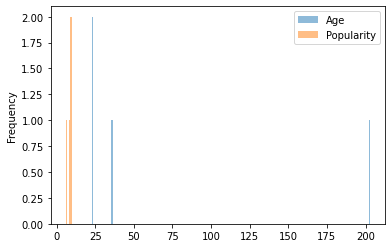

In [30]:
SW_df.plot.hist(bins=200, alpha=0.5)

In [35]:
SW_df.

SyntaxError: invalid syntax (<ipython-input-35-0dac0ed6d1ed>, line 1)